In [19]:
import sqlite3
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import pandasql as ps
cnx = sqlite3.connect('C:/Users/molot/Downloads/archive/database.sqlite')
match_df=pd.read_sql_query('''SELECT (home_team_goal+away_team_goal) AS sum_team_goal FROM League AS l JOIN "Match" AS m ON l.id==m.league_id AND m.league_id==10257''', cnx).squeeze()
#match_df


1. Очень часто коллеги упоминают Серию А. Может, она действительно интересная? Посмотрите, сколько там забивают суммарно голов за матч. Постройте гистограмму соответствующего данным типа. Оцените скошенность распределения визуально и подтвердите или опровергните свою гипотезу о скошенности, вычислив среднее, медиану и моду для проверки правила об их соотношении.

Распределение скошено влево
Среднее: 2.6168379184620485 
Мединана: 2.0 
Мода: [2]
Скошенность: 0.5970231915050065


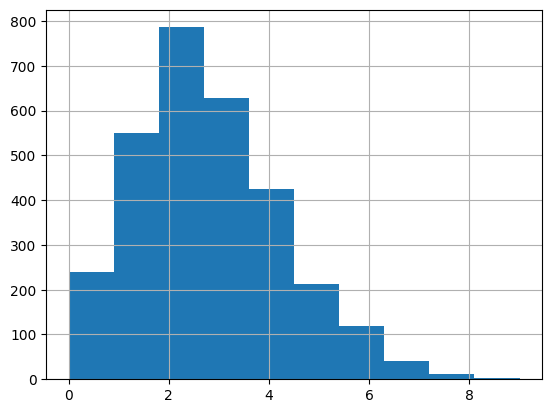

In [23]:
#analyse_date=match_df['home_team_goal']
match_df.hist(bins=10)
mean_goal=match_df.mean()
print(f"Среднее: {mean_goal} \nМединана: {match_df.median()} \nМода: {list(match_df.mode())}")
print(f"Скошенность: {st.skew(match_df)}")

Вывод:
Визуально и программно доказано, что распределение данных о количестве забитых за матч мячей скошено влево. Среднее больше Медианы и равно моде. Хвост справа длинее, чем слева

2. Не так уж много голов забивается в Серии А, а в каких лигах забивается в среднем голов за матч больше? Выведите их названия.

In [24]:
match_df_new=pd.read_sql_query("SELECT home_team_goal, away_team_goal, league_id FROM Match", cnx)
league_df=pd.read_sql_query("SELECT id,name FROM League", cnx)
match_df_new['team_goal']=match_df_new['away_team_goal']+match_df_new['home_team_goal']

new_df=pd.merge(match_df_new.groupby(['league_id'], as_index=False).mean(),league_df, left_on=['league_id'], right_on=['id'])
names=[]

for i in range(len(new_df)):
    if(new_df.iloc[i]['team_goal']>mean_goal):
        names.append(new_df.iloc[i]['name'])
print(f'больше голов за матч в среднем забивают:')
display(names)

больше голов за матч в среднем забивают:


['Belgium Jupiler League',
 'England Premier League',
 'Germany 1. Bundesliga',
 'Netherlands Eredivisie',
 'Scotland Premier League',
 'Spain LIGA BBVA',
 'Switzerland Super League']

3. Таких лиг довольно много. Выберем самую интересную лигу и самый интересный сезон в ней. Для этого посчитаем следующие показатели: 
a. сколько в среднем в каждом сезоне каждой лиги забивалось суммарно голов командами за матч
b. сколько в среднем матчей за сезон заканчивались победой, а не ничьей.

In [1]:
#a
df=pd.read_sql_query("SELECT * FROM Match", cnx)
#pd.set_option('display.max_rows', None)
seasons=df['season'].unique()
display(seasons)

leagus=df['league_id'].unique()
leagus

new_df_slah=df[['season','league_id','away_team_goal','home_team_goal']]
new_df_slah['team_goal']=new_df_slah['away_team_goal']+new_df_slah['home_team_goal']
new_df_slah
a=new_df_slah.groupby(['season','league_id']).mean()
display(a)


NameError: name 'pd' is not defined

In [60]:
#b
pd.set_option('display.max_rows', 50)
ks=[]
sr=[]
m=0
k=0
#for s in seasons:
 #   for l in leagus:
  #      for i in range(len(df)):
   #         if(df.iloc[i]['home_team_goal']!=df.iloc[i]['away_team_goal'] and df.iloc[i]['season']==s and df.iloc[i]['league_id']==l):
    #            #display(df.iloc[i]['home_team_goal'], df.iloc[i]['away_team_goal'], df.iloc[i]['season'])
     #           k+=1
      #  ks.append(k)
       # sr.append(ks[m]/len(df))
       # k=0
        #print(sr)
        #m+=1
#print(sr)
#сколько матчей в сезоне заканчивалось победой, а не ничьей
df_new=pd.read_sql_query("SELECT season, count(CASE WHEN home_team_goal>away_team_goal OR away_team_goal>home_team_goal THEN 1 END) victory, count(CASE WHEN home_team_goal>away_team_goal OR away_team_goal>home_team_goal IS NULL THEN 1 END) AS not_victory FROM Match Group by season", cnx)
display(df_new)


,season,victory,not_victory
0,2008/2009,2495,1566
1,2009/2010,2416,1532
2,2010/2011,2421,1520
3,2011/2012,2402,1498
4,2012/2013,2407,1444
5,2013/2014,2296,1404
6,2014/2015,2475,1494
7,2015/2016,2471,1459


4. Для каждого из двух показателей, рассчитанных в предыдущем шаге, выведите самый зрелищный сезон среди всех сезонов всех лиг.

In [73]:
#display(new_df_slah.sort_values(by='team_goal', ascending=False))
#display(df_new.sort_values(by='victory', ascending=False))
df_group=pd.merge(new_df_slah.groupby(['season']).agg(max).sort_values(by='team_goal', ascending=False),df_new.sort_values(by='victory', ascending=False), left_on=['season'], right_on=['season'])
display(df_group)

C:\Users\molot\AppData\Local\Temp\ipykernel_12644\3893706233.py:3: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_group=pd.merge(new_df_slah.groupby(['season']).agg(max).sort_values(by='team_goal', ascending=False),df_new.sort_values(by='victory', ascending=False), left_on=['season'], right_on=['season'])


,season,league_id,away_team_goal,home_team_goal,team_goal,victory,not_victory
0,2009/2010,24558,7,9,12,2416,1532
1,2015/2016,24558,9,10,12,2471,1459
2,2012/2013,24558,7,9,11,2407,1444
3,2010/2011,24558,8,10,10,2421,1520
4,2011/2012,24558,7,8,10,2402,1498
5,2013/2014,24558,7,7,10,2296,1404
6,2014/2015,24558,8,9,10,2475,1494
7,2008/2009,24558,7,7,9,2495,1566


Самым зрелищным является сезон 2009/2010

5. Насколько показатели, рассчитанные в шаге 3, взаимосвязаны? Оцените их корреляцию и постройте для них диаграмму рассеивания, чтобы ответить на этот вопрос.

6. Выберите лигу с самым интересным сезоном. Чтобы разобраться в правилах футбола и не заскучать, посмотрим именно этот сезон! 

7. Интересно, а можно ли гарантировать, что в этой лиге всегда такой интересный футбол? Оцените математическое ожидание и стандартное отклонение среднего количества голов за матч с помощью имеющейся выборки. Затем постройте ящик с усами. И сделайте вывод, можно ли быть уверенным, что матчи в этой лиге всегда результативные.